In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_theme(style="darkgrid")


In [8]:
df =pd.read_csv('GlobalTemperatures.csv')
df.head()
df = df.drop(columns = ['LandMaxTemperature','LandMaxTemperatureUncertainty','LandMinTemperature','LandMinTemperatureUncertainty','LandAndOceanAverageTemperature','LandAndOceanAverageTemperatureUncertainty'])
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574
1,1750-02-01,3.083,3.702
2,1750-03-01,5.626,3.076
3,1750-04-01,8.490,2.451
4,1750-05-01,11.573,2.072


In [9]:
print(df.isnull().sum())

dt                                    0
LandAverageTemperature               12
LandAverageTemperatureUncertainty    12
dtype: int64


In [4]:
df.dropna(inplace=True)

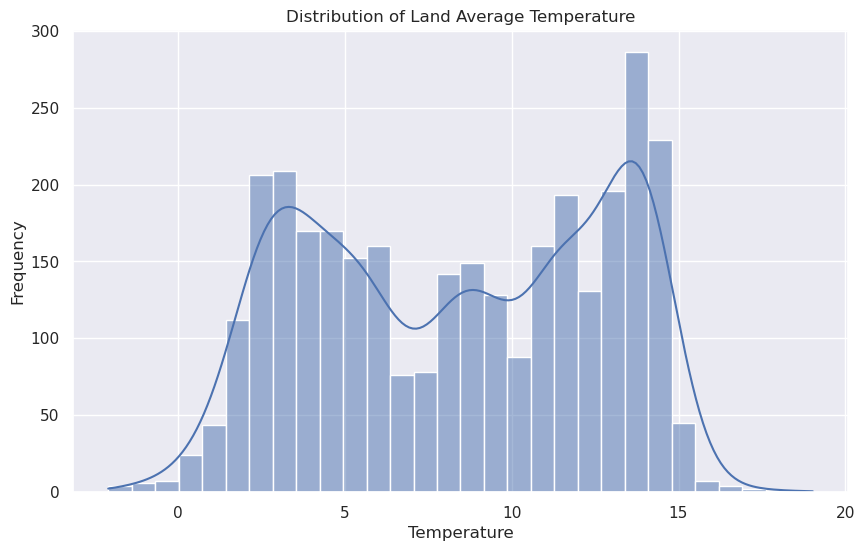

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['LandAverageTemperature'], bins=30, kde=True)
plt.title('Distribution of Land Average Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


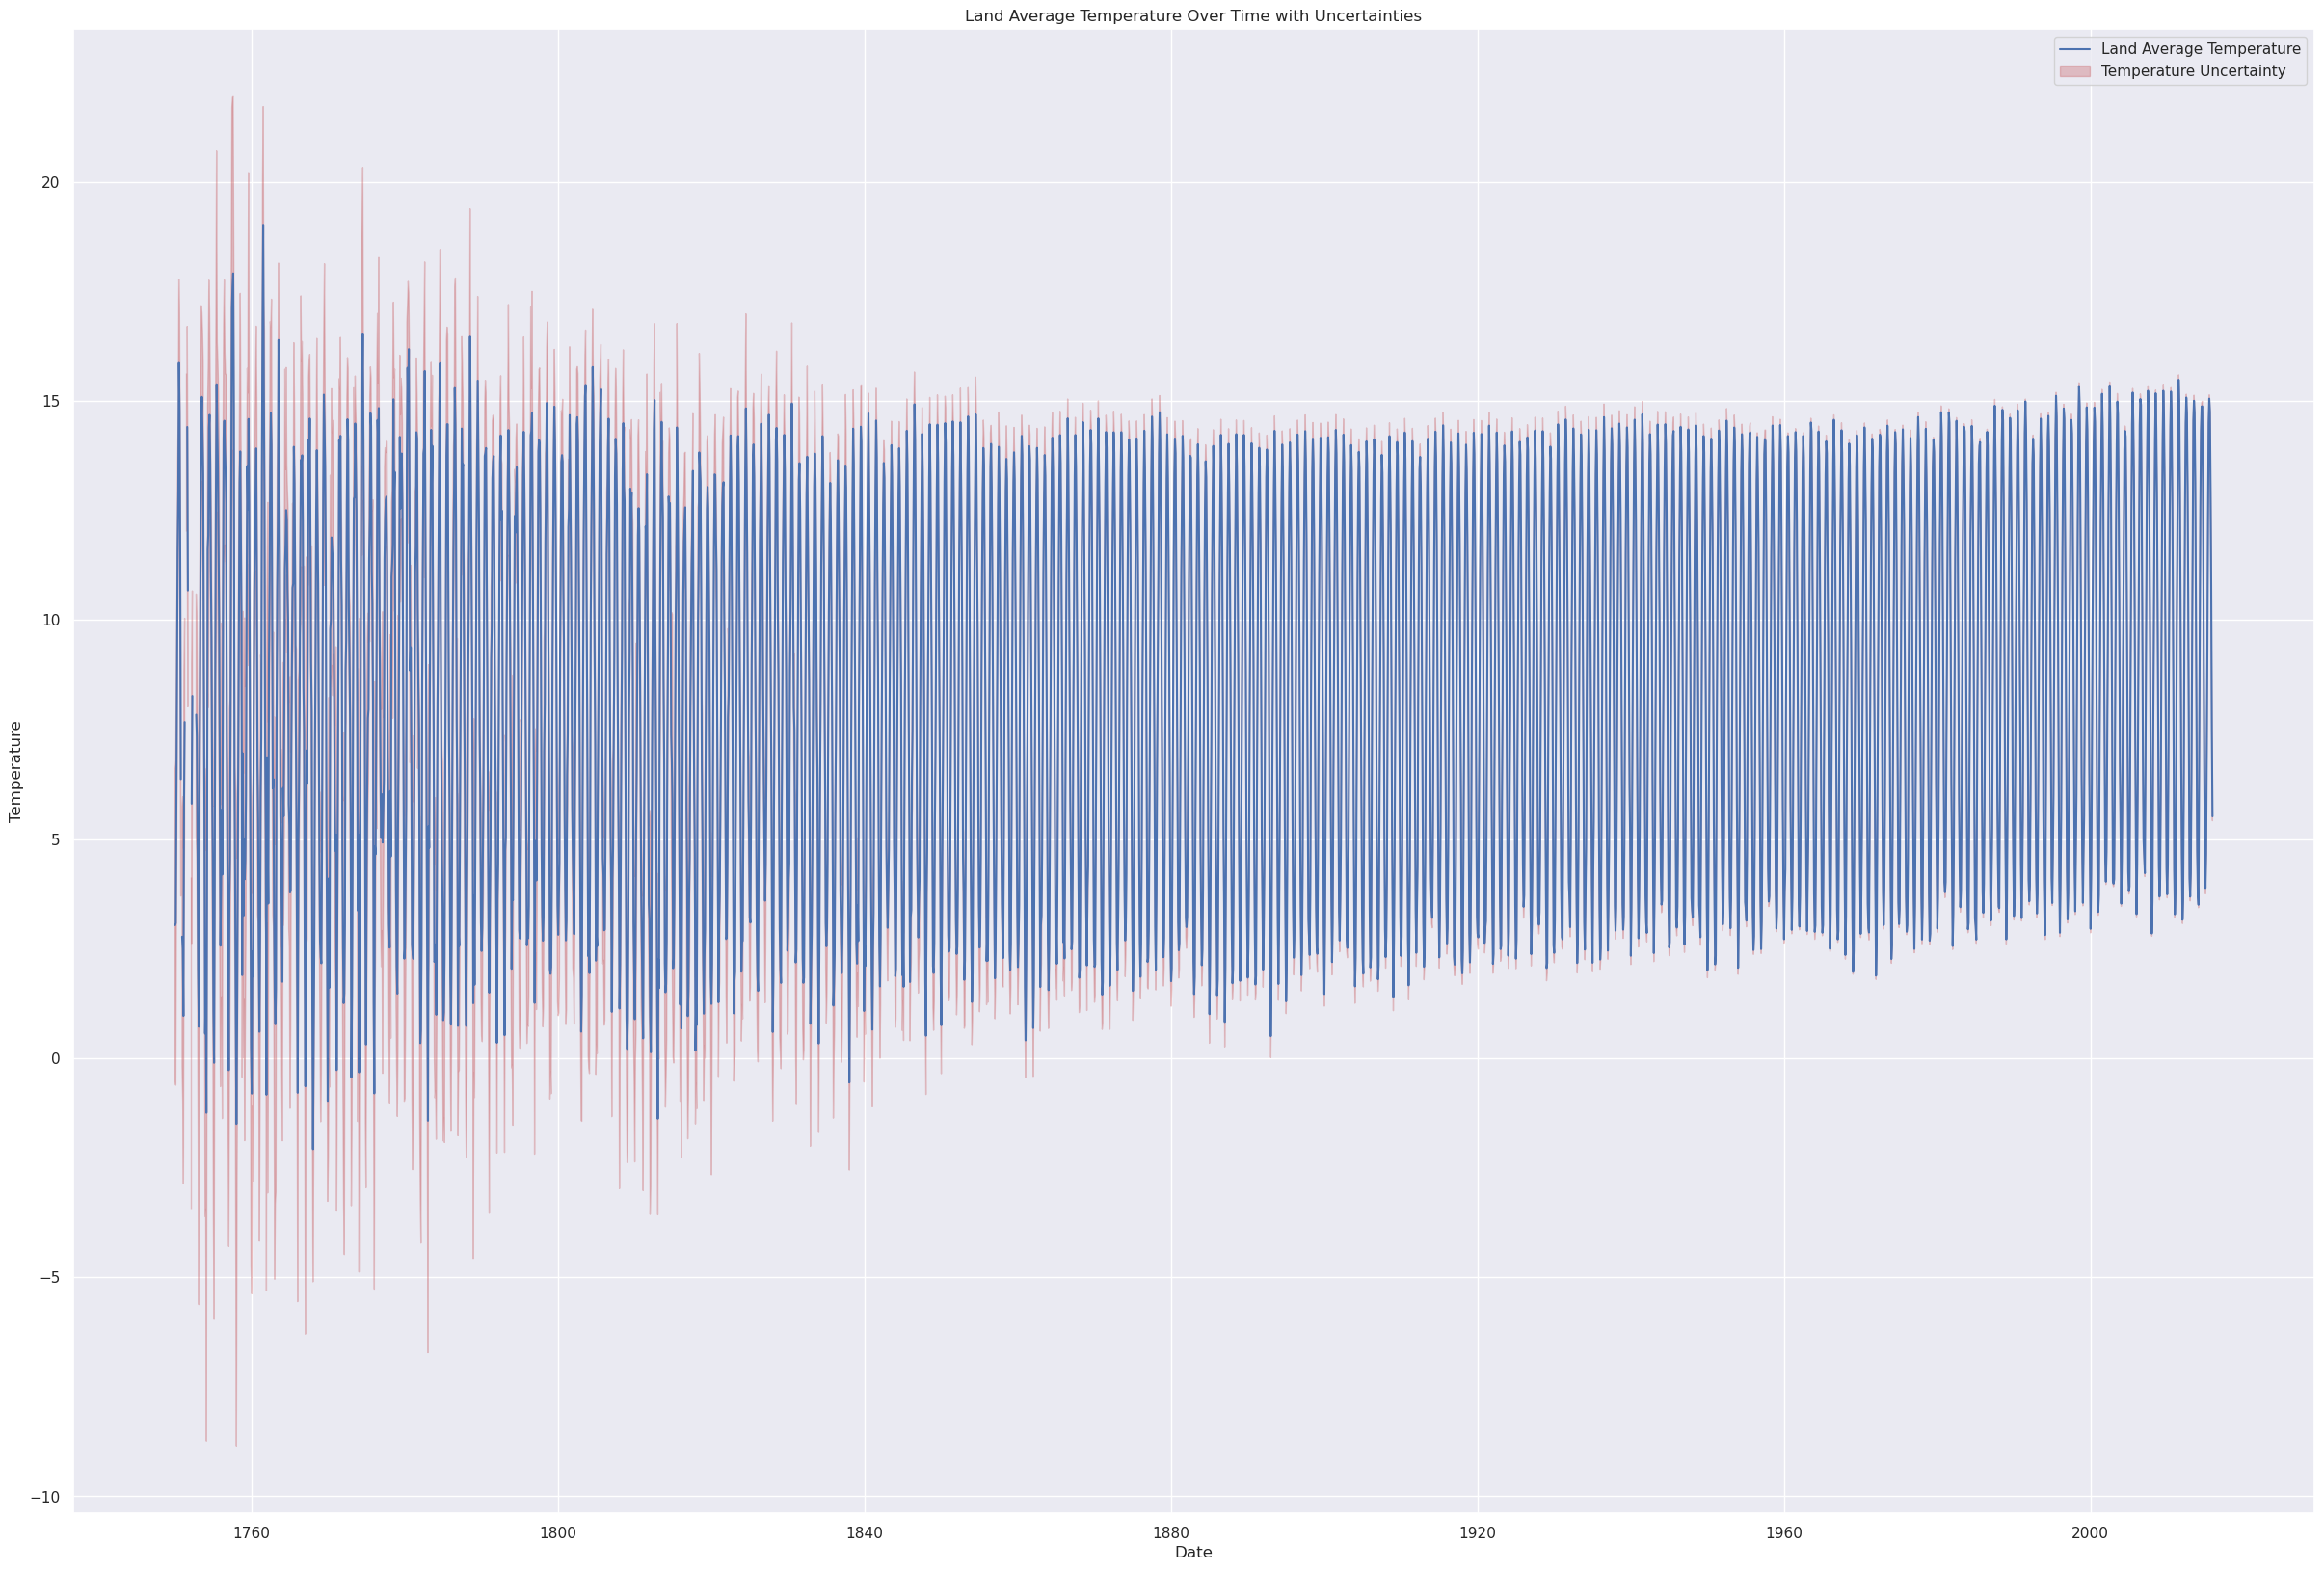

In [21]:
df['dt'] = pd.to_datetime(df['dt'])

plt.figure(figsize=(30, 20))
plt.plot(df['dt'], df['LandAverageTemperature'], label='Land Average Temperature')
plt.fill_between(df['dt'], 
                 df['LandAverageTemperature'] - df['LandAverageTemperatureUncertainty'], 
                 df['LandAverageTemperature'] + df['LandAverageTemperatureUncertainty'], 
                 color='r', alpha=0.3, label='Temperature Uncertainty')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Land Average Temperature Over Time with Uncertainties')
plt.legend()
plt.show()


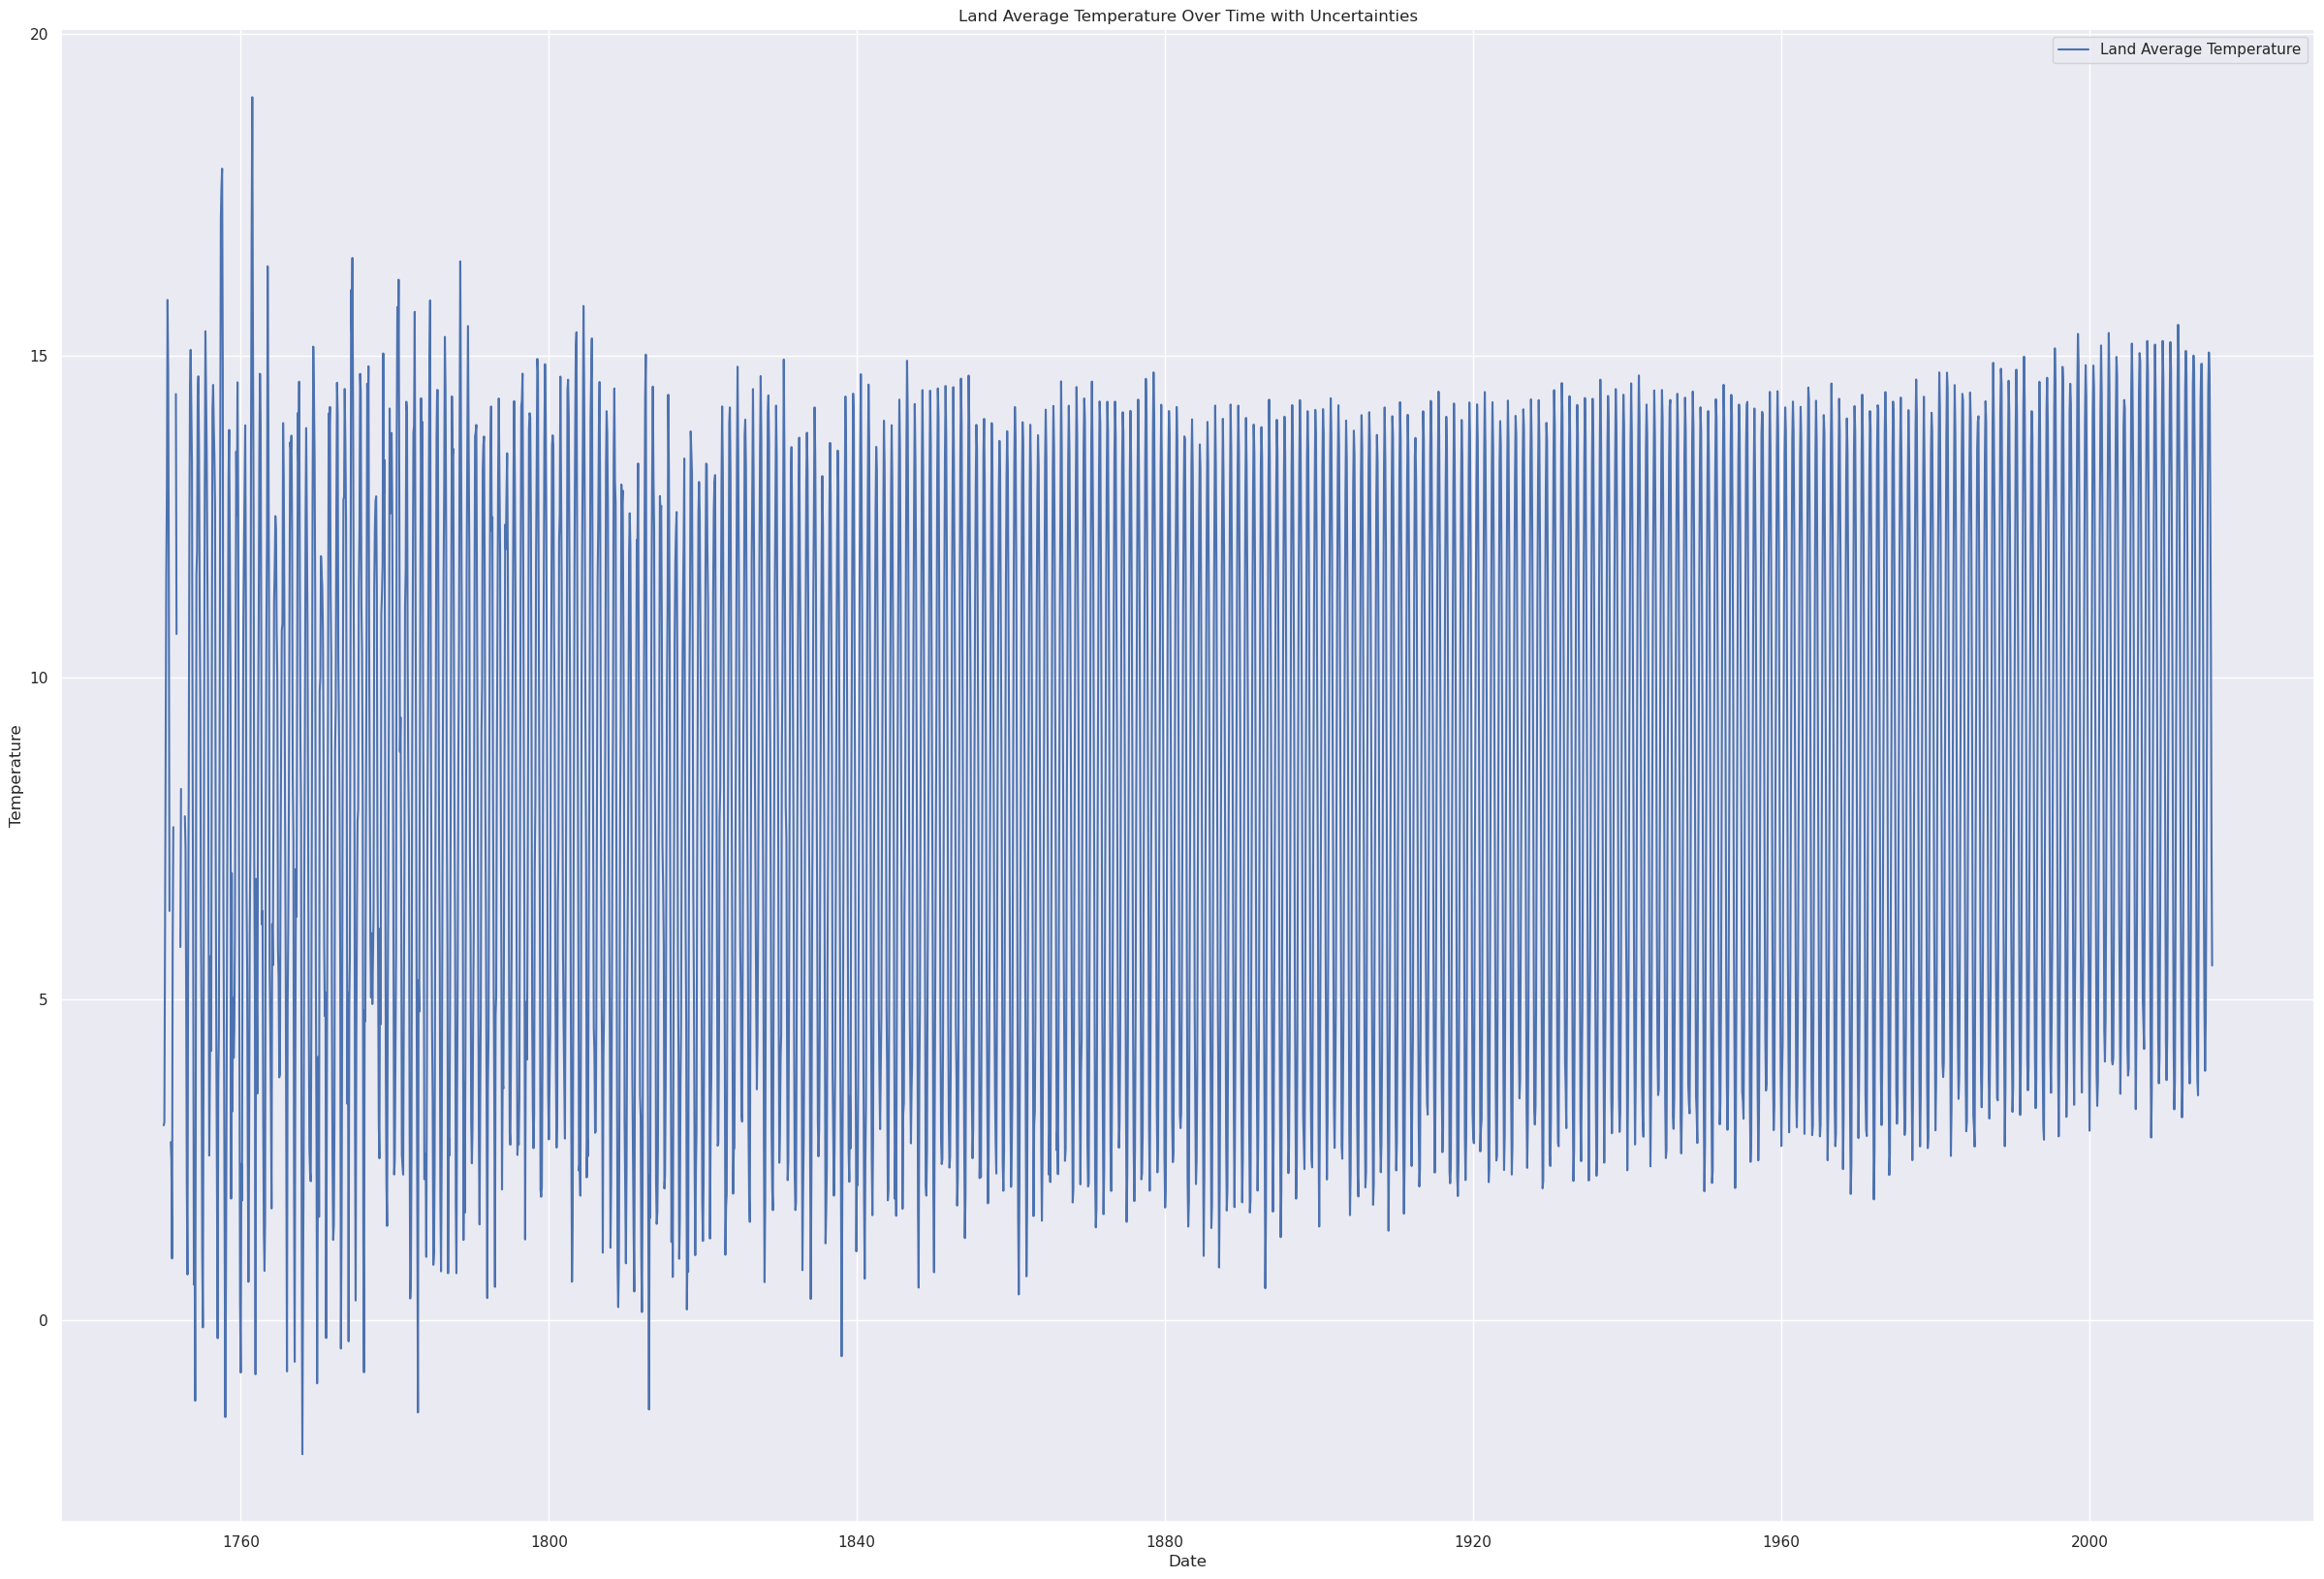

In [22]:
df['dt'] = pd.to_datetime(df['dt'])
plt.figure(figsize=(30, 20))
plt.plot(df['dt'], df['LandAverageTemperature'], label='Land Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Land Average Temperature Over Time with Uncertainties')
plt.legend()
plt.show()


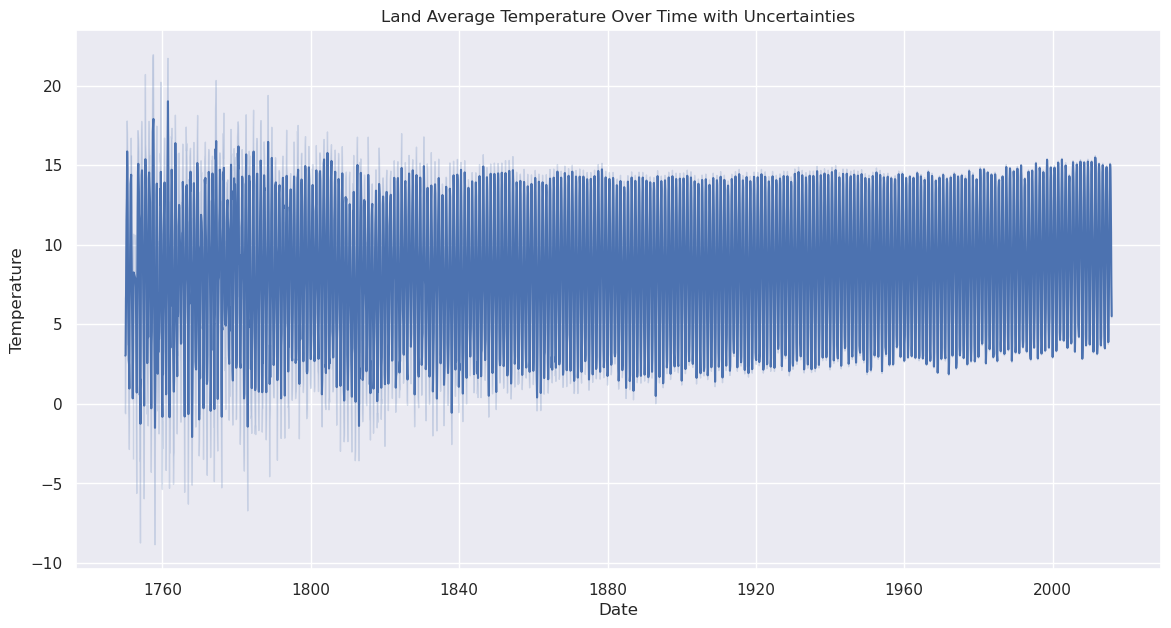

In [23]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='dt', y='LandAverageTemperature', data=df)
plt.fill_between(df['dt'], 
                 df['LandAverageTemperature'] - df['LandAverageTemperatureUncertainty'], 
                 df['LandAverageTemperature'] + df['LandAverageTemperatureUncertainty'], 
                 color='b', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Land Average Temperature Over Time with Uncertainties')
plt.show()


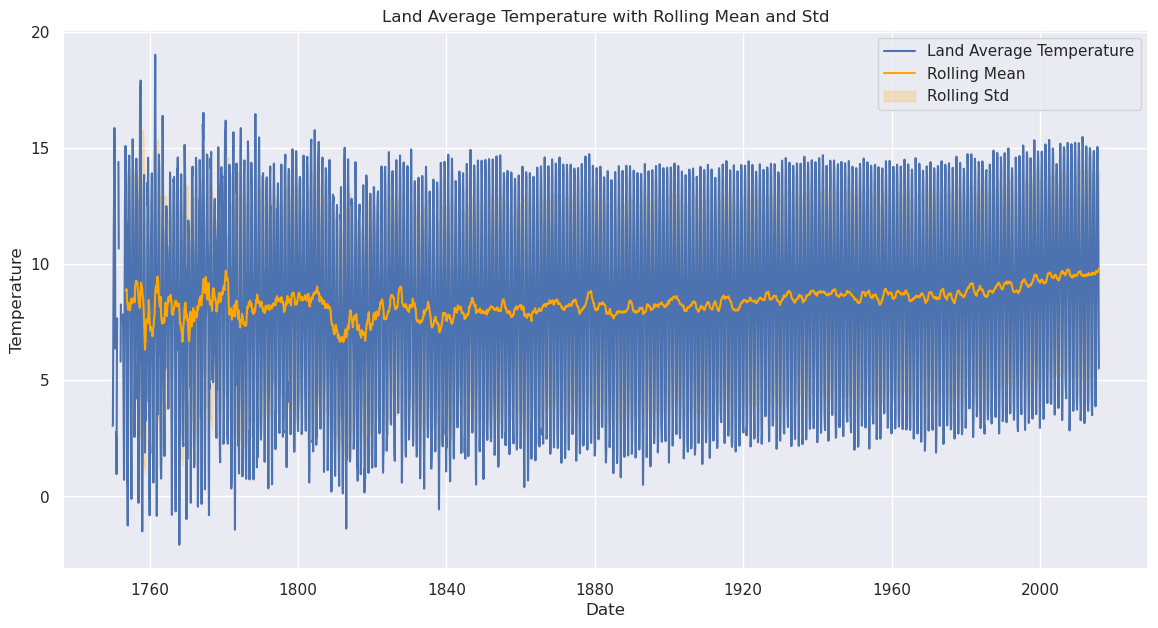

In [24]:
df['RollingMean'] = df['LandAverageTemperature'].rolling(window=12).mean()
df['RollingStd'] = df['LandAverageTemperature'].rolling(window=12).std()

plt.figure(figsize=(14, 7))
plt.plot(df['dt'], df['LandAverageTemperature'], label='Land Average Temperature')
plt.plot(df['dt'], df['RollingMean'], label='Rolling Mean', color='orange')
plt.fill_between(df['dt'], df['RollingMean'] - df['RollingStd'], df['RollingMean'] + df['RollingStd'], color='orange', alpha=0.2, label='Rolling Std')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Land Average Temperature with Rolling Mean and Std')
plt.legend()
plt.show()


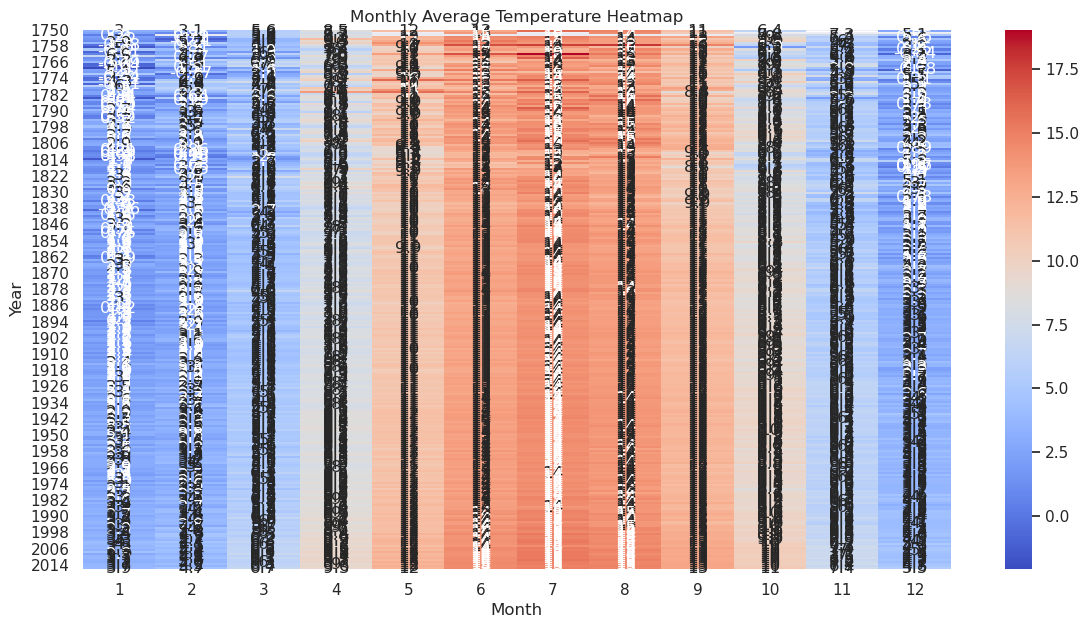

In [26]:
df['Year'] = df['dt'].dt.year
df['Month'] = df['dt'].dt.month

monthly_avg = df.pivot_table('LandAverageTemperature', index='Year', columns='Month')

plt.figure(figsize=(14, 7))
sns.heatmap(monthly_avg, cmap='coolwarm', annot=True)
plt.title('Monthly Average Temperature Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


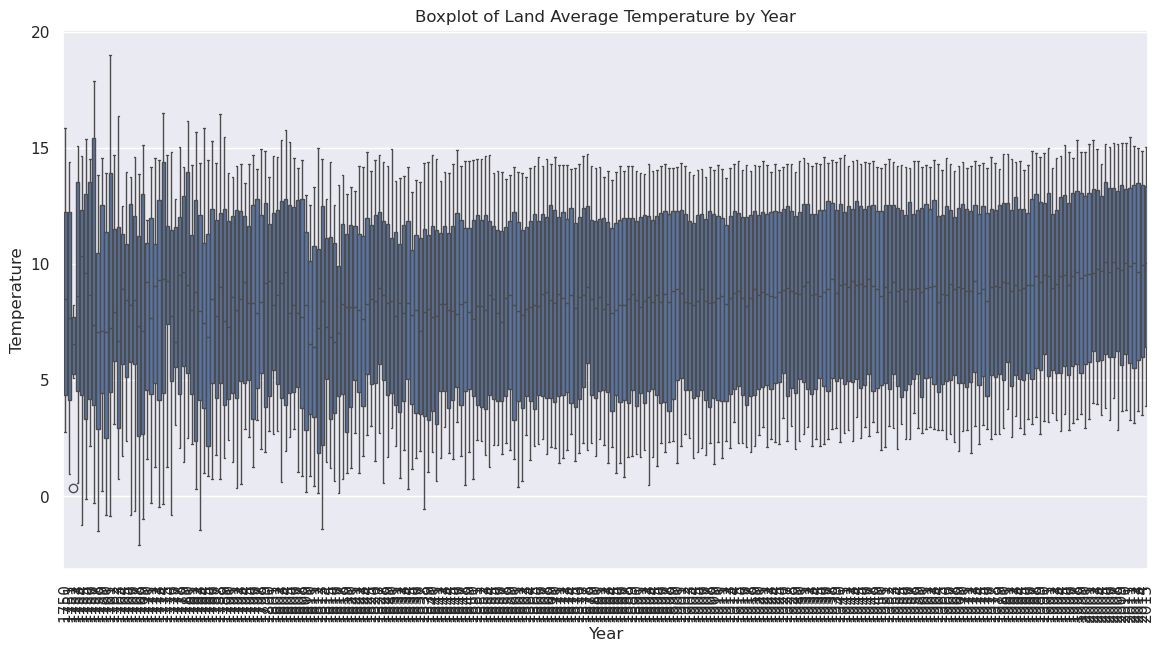

In [27]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Year', y='LandAverageTemperature', data=df)
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Boxplot of Land Average Temperature by Year')
plt.xticks(rotation=90)
plt.show()


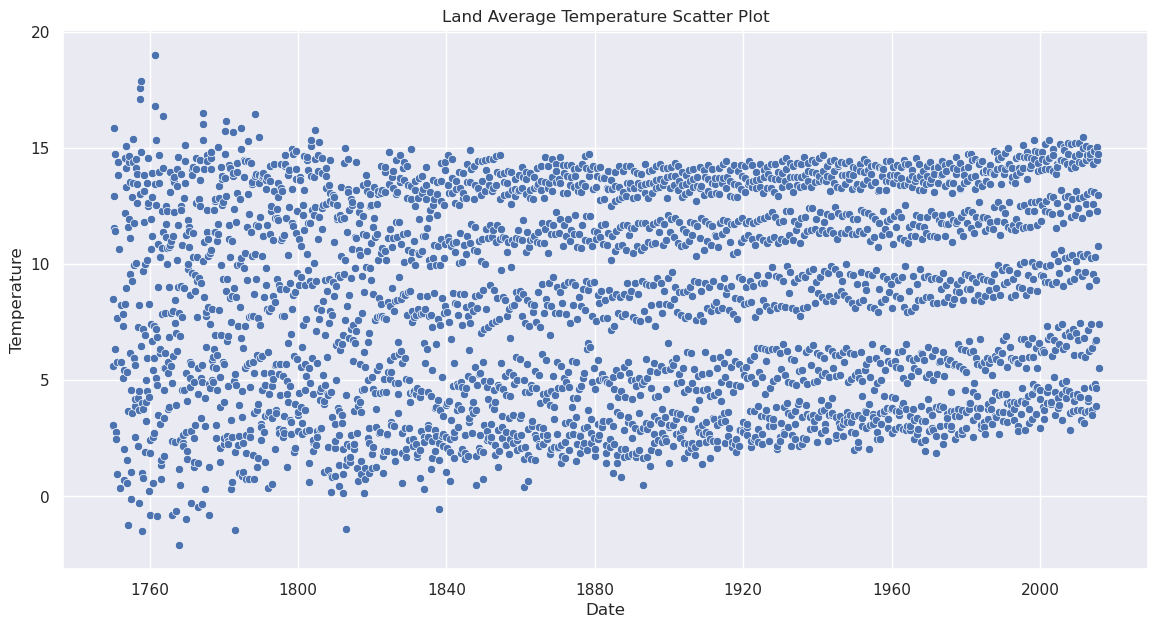

In [28]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='dt', y='LandAverageTemperature', data=df)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Land Average Temperature Scatter Plot')
plt.show()


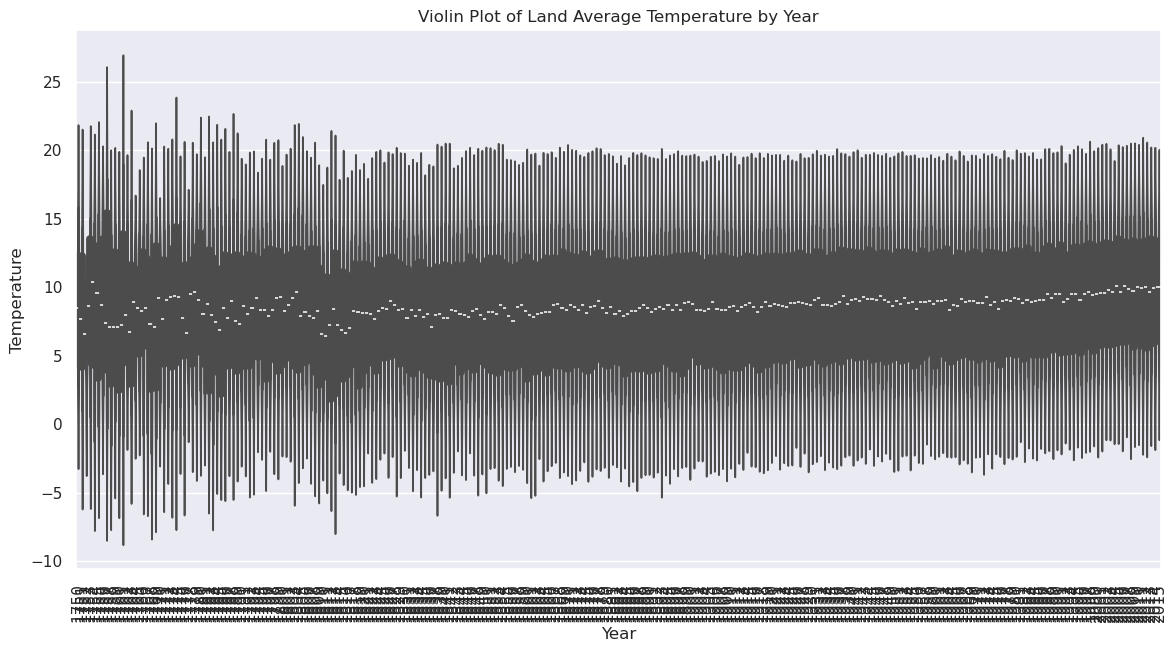

In [29]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='Year', y='LandAverageTemperature', data=df)
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Violin Plot of Land Average Temperature by Year')
plt.xticks(rotation=90)
plt.show()


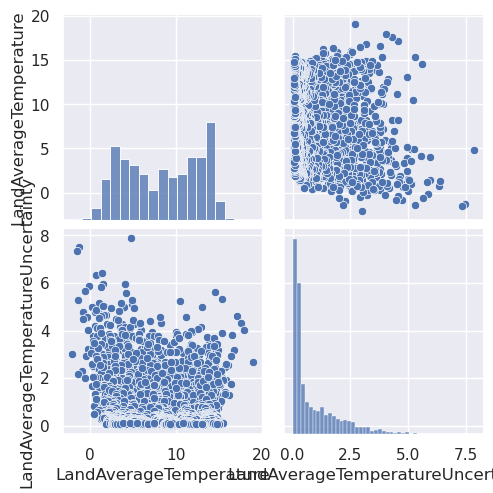

In [30]:
sns.pairplot(df[['LandAverageTemperature', 'LandAverageTemperatureUncertainty']])
plt.show()


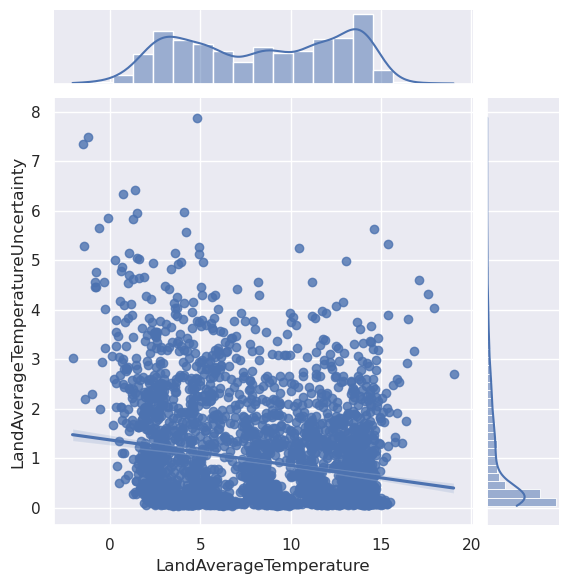

In [31]:
sns.jointplot(x='LandAverageTemperature', y='LandAverageTemperatureUncertainty', data=df, kind='reg')
plt.show()


In [34]:
def plot_average_temp(df,col1,col2,label):
  cols = [col1,col2]
  temp_df = df[cols]
  average_per_year = temp_df.groupby(temp_df.index)[cols].mean()
  average_per_year['lower temp'] = average_per_year[col1] - average_per_year[col2]
  average_per_year['upper temp'] = average_per_year[col1] + average_per_year[col2]

  plt.figure(figsize=(12,6))
  plt.plot(average_per_year.index, average_per_year[col1], color='red', label='Average')
  plt.plot(average_per_year.index, average_per_year['upper temp'], color='blue', alpha=0.3)
  plt.plot(average_per_year.index, average_per_year['lower temp'], color='blue', alpha=0.3)
  plt.fill_between(average_per_year.index, average_per_year['upper temp'], average_per_year['lower temp'], color='lightblue', alpha=0.3, label='Temperature Uncertainty Boundaries')
  plt.xlabel('Year')
  plt.ylabel('Average Temperature')
  plt.title(label)
  plt.legend(loc='best')

# Land Average Temperature
plot_average_temp(temp_df_cleaned,'LandAverageTemperature','LandAverageTemperatureUncertainty','Land Average Temperature per Year')

NameError: name 'temp_df_cleaned' is not defined